In [4]:
%matplotlib inline

In [146]:
if True: 
    import matplotlib.pylab as plt
    import numpy as np
    
    def myfloat(b):
        try: 
            b = float(b)
        except ValueError:
            b = float(b.split('-')[0])*10**(-float(b.split('-')[1]))
        return b
    
    t = []
    itp = []  #  print step
    it = []   #  time step
    f =  open("output/time.out", 'r')
    f.next()
    for line in f:
        a = (line.strip().split(" "))
        a = [b for b in a if b]
        t.append(float(a[0]))
        itp.append(int(a[1]))
        it.append(int(a[2]))
        
    coords = []
    for line in open("coords", 'r'):
        item = line.rstrip()  # strip off newline and any other trailing whitespace
        coords.append(line)

    npt, ne = [int(j) for j in coords[0].split()]
    x = np.zeros(npt + 1)
    y = np.zeros(npt + 1)
    z = np.zeros(npt + 1)
    for i in range(1, npt + 1):
        x[i], y[i], z[i] = [float(l) for l in coords[i].split()]
    
    slope = (np.max(z) - np.min(z))/(np.max(y) - np.min(y))*100


In [147]:
t

[10.0,
 20.0,
 30.0,
 40.0,
 50.0,
 60.0,
 80.0,
 100.0,
 120.0,
 140.0,
 160.0,
 180.0,
 200.0,
 220.0,
 240.0,
 260.0,
 280.0,
 300.0,
 320.0,
 340.0,
 360.0,
 380.0,
 400.0,
 420.0,
 440.0,
 460.0,
 480.0,
 500.0,
 520.0,
 540.0,
 560.0,
 580.0,
 600.0,
 620.0,
 640.0,
 660.0,
 680.0,
 700.0,
 720.0,
 740.0,
 760.0,
 780.0,
 800.0,
 820.0,
 840.0,
 860.0,
 880.0,
 900.0,
 920.0,
 940.0,
 960.0,
 980.0,
 1000.0,
 1020.0,
 1040.0,
 1060.0,
 1080.0,
 1100.0,
 1120.0,
 1140.0,
 1160.0,
 1180.0,
 1200.0,
 1220.0,
 1240.0,
 1260.0,
 1280.0,
 1300.0,
 1320.0,
 1340.0,
 1360.0,
 1380.0,
 1400.0,
 1420.0,
 1440.0,
 1460.0,
 1480.0,
 1500.0,
 1520.0,
 1540.0,
 1560.0,
 1580.0,
 1600.0,
 1620.0,
 1640.0,
 1660.0,
 1680.0,
 1700.0,
 1720.0,
 1740.0,
 1760.0,
 1780.0,
 1800.0,
 1820.0,
 1840.0,
 1860.0,
 1880.0,
 1900.0,
 1920.0,
 1940.0,
 1960.0,
 1980.0,
 2000.0]

In [148]:
ntstep = len(itp)
# tmax = t[-1]
# dt = (t[-1] - t[-2])/(it[-1] - it[-2])
hnorm = 0.4
case = "open"

In [149]:
def get_dvol(fname):
    t = []; 
    dvol = [];
    infl = [];
    flux = [];    
    rain = [];    
    f = open(fname, 'r'); 
    for line in f:
        a = (line.strip().split(" "))
        a = [myfloat(b) for b in a if b]
        t.append(a[0])
        dvol.append(a[1])
        flux.append(a[2])
        infl.append(a[3])
        rain.append(a[4])
    t = np.array(t)
    dvol = np.array(dvol)
    flux = np.array(flux)
    infl = np.array(infl)
    total = np.cumsum(dvol  - flux - infl- rain)
    return t, dvol, flux, infl,rain, total

In [150]:
# t_check, dvol_check, flux_check, infl_check, total_check  = get_dvol('dvol.out')
# print sum(dvol_check-dvol), sum(flux_check-flux), sum(infl_check-infl)

In [151]:
(dvol[ti:tf:nprt] - flux[ti:tf:nprt] - infl[ti:tf:nprt] - rain[ti:tf:nprt])[0]

-0.0012120707000000007

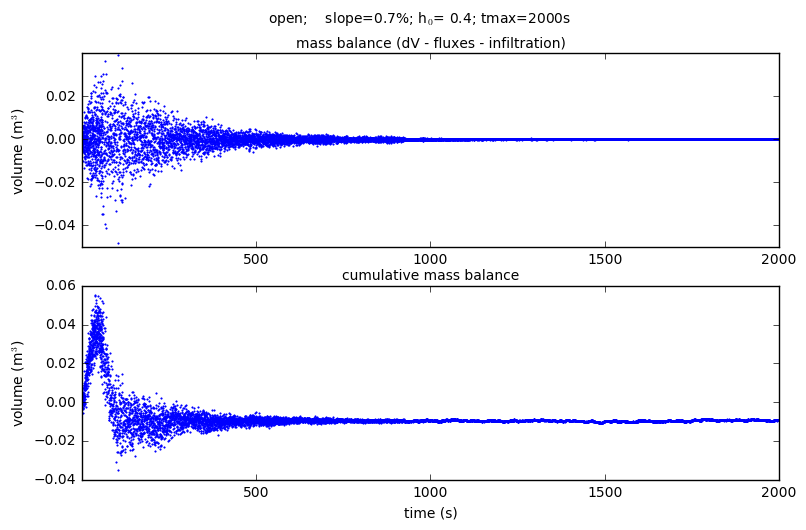

In [152]:
t, dvol, flux, infl, rain, total  = get_dvol('output/dvol.out')
ti = 0; tf =len(t)-1;  nprt = 1

f = plt.figure(figsize= (9,5.5))
plt.subplot(211)
plt.plot(t[ti:tf:nprt], dvol[ti:tf:nprt] - flux[ti:tf:nprt] - infl[ti:tf:nprt] 
         - rain[ti:tf:nprt], '.', ms = 2)
# plt.plot(t[ti:tf:nprt**2], dvol[ti:tf:nprt**2] - flux[ti:tf:nprt**2] - infl[ti:tf:nprt**2], '.', ms = 6)
plt.title('mass balance (dV - fluxes - infiltration)', fontsize = 10)
plt.ylabel('volume (m$^3$)'); plt.xlim([t[ti], t[tf]])
plt.subplot(212)
plt.plot(t[ti:tf:nprt],total[ti:tf:nprt], '.', ms = 2)
plt.title('cumulative mass balance', fontsize = 10)
plt.xlabel('time (s)'); plt.ylabel('volume (m$^3$)');
plt.xlim([t[ti], t[tf]])
plt.suptitle('{0}; \t slope={1:.1f}%; h$_0$= {2:.1f}; tmax={3:0.0f}s'.format(
        case, slope, hnorm, t[-1]))
f.savefig('plots/slope={1:.1f}%; h0={2:.1f}; tmax={3:0.0f}.pdf'.format(
        case, slope, hnorm, t[-1]))

# ani.save('plots/h slope={0:.1f}% tmax={1:.0f}s.mp4'.format(slope,tmax))


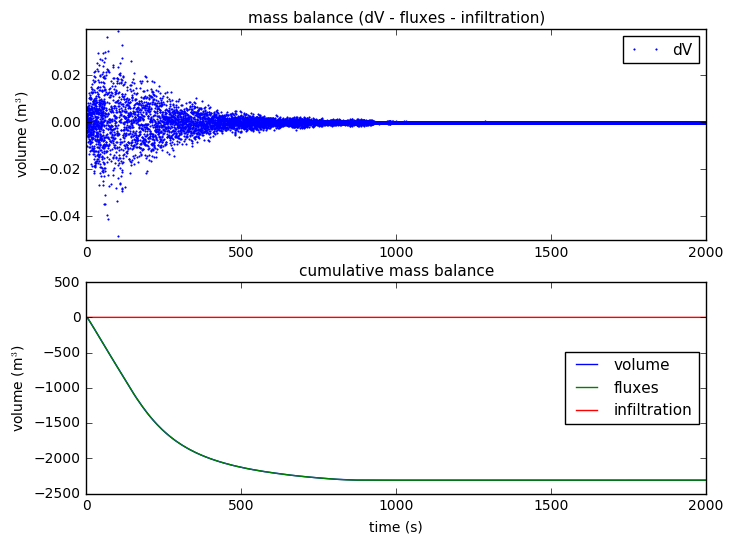

In [153]:
ti = 0; tf = len(t)+1;  nprt = 1
f = plt.figure(figsize= (8,6))
plt.subplot(211)
plt.plot(t[ti:tf:nprt], dvol[ti:tf:nprt] - flux[ti:tf:nprt], '.', ms= 2, label = 'dV')
# plt.plot(t[ti:tf:nprt], rain[ti:tf:nprt], '.', ms= 2, label = 'dV')
# plt.plot(t[ti:tf:nprt], flux[ti:tf:nprt] , '.',  ms= 2, label = 'flux')
# plt.plot(t[ti:tf:nprt], - infl[ti:tf:nprt], '.', ms= 2, label = 'infl')
plt.title('mass balance (dV - fluxes - infiltration)', fontsize = 11)
plt.ylabel('volume (m$^3$)')
plt.legend(loc = 'best', fontsize= 11)


plt.subplot(212)
plt.plot(t[ti:tf:nprt],  np.cumsum(dvol)[ti:tf:nprt], label = 'volume')
plt.plot(t[ti:tf:nprt],  np.cumsum(flux)[ti:tf:nprt], label = 'fluxes')
plt.plot(t[ti:tf:nprt], -  np.cumsum(infl)[ti:tf:nprt], label = 'infiltration')
plt.legend(loc = 'best', fontsize= 11)
plt.title('cumulative mass balance', fontsize = 11)
plt.ylabel('volume (m$^3$)'); plt.xlabel('time (s)')